In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the raw dataset
import os

# Check what files are in the data/raw directory
os.chdir("C:/Users/Inchara/SHOPPER-SPECTRUM")  # ✅ Change this path if your project is elsewhere

# Then list the raw folder
raw_files = os.listdir("data/raw")
print("Files in raw folder:", raw_files)

# Load the dataset
dataset_file = None
for file in raw_files:
    if file.endswith('.csv'):
        dataset_file = file
        break

if dataset_file:
    print(f"Loading dataset: {dataset_file}")
    df_raw = pd.read_csv(f'data/raw/{dataset_file}')
    print("✓ Dataset loaded successfully!")
else:
    # Try Excel files
    for file in raw_files:
        if file.endswith(('.xlsx', '.xls')):
            print(f"Loading Excel file: {file}")
            df_raw = pd.read_excel(f'data/raw/{file}')
            dataset_file = file
            print("✓ Excel dataset loaded successfully!")
            break

if dataset_file is None:
    raise FileNotFoundError("No dataset file found in data/raw directory")

print(f"Original dataset shape: {df_raw.shape}")

Files in raw folder: ['online_retail.csv']
Loading dataset: online_retail.csv
✓ Dataset loaded successfully!
Original dataset shape: (541909, 8)


=== ORIGINAL DATASET OVERVIEW ===
Shape: (541909, 8)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
Memory usage: 175.20 MB

First 5 rows:
=== INITIAL DATA QUALITY ===

1. Missing Values:
Description      1454
CustomerID     135080
dtype: int64

2. Cancelled Orders: 9288 (1.71%)

3. Negative/Zero Quantities: 10624 (1.96%)

4. Negative/Zero Prices: 2517 (0.46%)

5. Duplicate Rows: 5268 (0.97%)
=== STARTING DATA PREPROCESSING ===
Starting with 541909 records

=== STEP 2: REMOVING MISSING CUSTOMER IDs ===
Step 2: Removed 135080 records, 406829 remaining (75.07%)
✓ Removed records without CustomerID
Remaining unique customers: 4372

=== STEP 3: REMOVING CANCELLED INVOICES ===
Step 3: Removed 8905 records, 397924 remaining (73.43%)
✓ Removed cancelled orders

=== STEP 4: REMOVING INVALID QUANTITIES ===
Step 4: Removed 0 records, 397924 remaining (73.43%)
✓ Removed invalid quantities
Quantity range: 1 to 80995

=== STEP 5: 

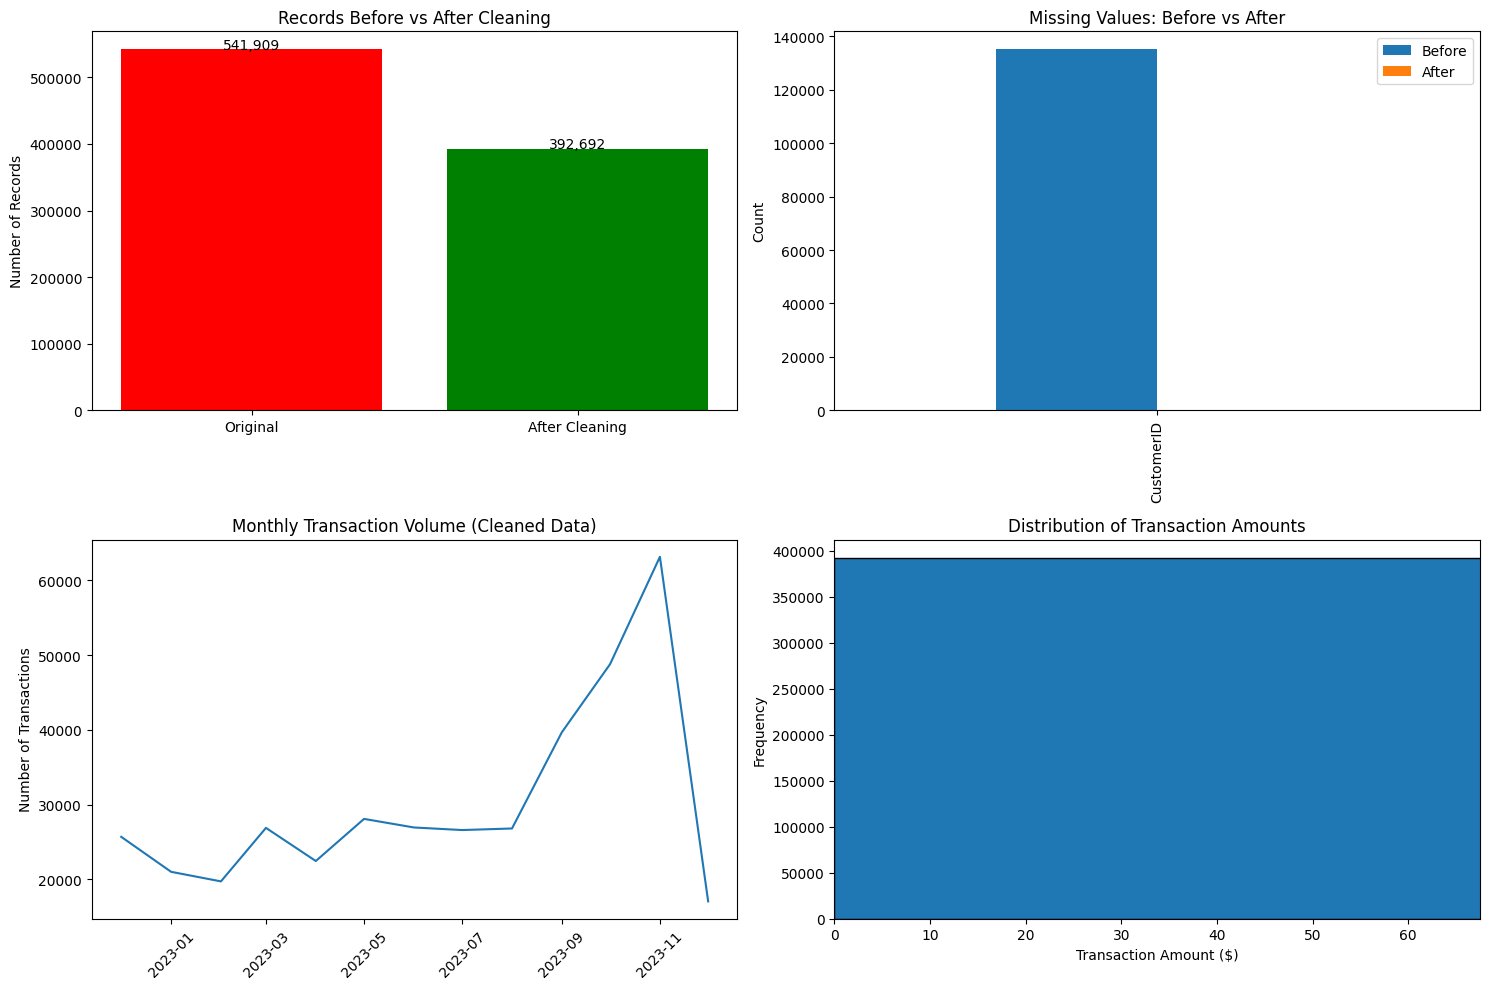


=== SAVING CLEANED DATASET ===
✓ Cleaned dataset saved to: data/processed/cleaned_ecommerce_data.csv
✓ Preprocessing summary saved to: data/processed/preprocessing_summary.csv
✓ Data quality report saved to: data/processed/data_quality_report.csv

🎉 Data preprocessing completed successfully!
📁 Cleaned dataset available at: data/processed/cleaned_ecommerce_data.csv
📊 Dataset ready for EDA and modeling!


In [4]:
# Display initial dataset info
print("=== ORIGINAL DATASET OVERVIEW ===")
print(f"Shape: {df_raw.shape}")
print(f"Columns: {list(df_raw.columns)}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Show sample data
print("\nFirst 5 rows:")
df_raw.head()

# %%
# Initial data quality assessment
print("=== INITIAL DATA QUALITY ===")

# Missing values
print("\n1. Missing Values:")
missing_before = df_raw.isnull().sum()
print(missing_before[missing_before > 0])

# Cancelled orders
cancelled_before = df_raw[df_raw['InvoiceNo'].astype(str).str.startswith('C', na=False)]
print(f"\n2. Cancelled Orders: {len(cancelled_before)} ({len(cancelled_before)/len(df_raw)*100:.2f}%)")

# Negative quantities
negative_qty_before = df_raw[df_raw['Quantity'] <= 0]
print(f"\n3. Negative/Zero Quantities: {len(negative_qty_before)} ({len(negative_qty_before)/len(df_raw)*100:.2f}%)")

# Negative prices
negative_price_before = df_raw[df_raw['UnitPrice'] <= 0]
print(f"\n4. Negative/Zero Prices: {len(negative_price_before)} ({len(negative_price_before)/len(df_raw)*100:.2f}%)")

# Duplicates
duplicates_before = df_raw.duplicated().sum()
print(f"\n5. Duplicate Rows: {duplicates_before} ({duplicates_before/len(df_raw)*100:.2f}%)")

# %%
# Step 1: Create a copy for preprocessing
df = df_raw.copy()
print("=== STARTING DATA PREPROCESSING ===")
print(f"Starting with {df.shape[0]} records")

# Track preprocessing steps
preprocessing_log = {
    'step': [],
    'description': [],
    'records_removed': [],
    'records_remaining': [],
    'percentage_remaining': []
}

def log_preprocessing_step(step_name, description, df_before, df_after):
    """Log preprocessing steps for tracking"""
    records_removed = len(df_before) - len(df_after)
    records_remaining = len(df_after)
    percentage_remaining = (len(df_after) / len(df_raw)) * 100
    
    preprocessing_log['step'].append(step_name)
    preprocessing_log['description'].append(description)
    preprocessing_log['records_removed'].append(records_removed)
    preprocessing_log['records_remaining'].append(records_remaining)
    preprocessing_log['percentage_remaining'].append(round(percentage_remaining, 2))
    
    print(f"{step_name}: Removed {records_removed} records, {records_remaining} remaining ({percentage_remaining:.2f}%)")

# %%
# Step 2: Remove rows with missing CustomerID
print("\n=== STEP 2: REMOVING MISSING CUSTOMER IDs ===")
df_before = df.copy()

# Remove rows where CustomerID is null
df = df.dropna(subset=['CustomerID'])

log_preprocessing_step("Step 2", "Remove missing CustomerID", df_before, df)

print(f"✓ Removed records without CustomerID")
print(f"Remaining unique customers: {df['CustomerID'].nunique()}")

# %%
# Step 3: Exclude cancelled invoices
print("\n=== STEP 3: REMOVING CANCELLED INVOICES ===")
df_before = df.copy()

# Remove invoices starting with 'C'
df = df[~df['InvoiceNo'].astype(str).str.startswith('C', na=False)]

log_preprocessing_step("Step 3", "Remove cancelled invoices (InvoiceNo starting with 'C')", df_before, df)

print(f"✓ Removed cancelled orders")

# %%
# Step 4: Remove negative or zero quantities
print("\n=== STEP 4: REMOVING INVALID QUANTITIES ===")
df_before = df.copy()

# Remove records with quantity <= 0
df = df[df['Quantity'] > 0]

log_preprocessing_step("Step 4", "Remove zero/negative quantities", df_before, df)

print(f"✓ Removed invalid quantities")
print(f"Quantity range: {df['Quantity'].min()} to {df['Quantity'].max()}")

# %%
# Step 5: Remove negative or zero prices
print("\n=== STEP 5: REMOVING INVALID PRICES ===")
df_before = df.copy()

# Remove records with UnitPrice <= 0
df = df[df['UnitPrice'] > 0]

log_preprocessing_step("Step 5", "Remove zero/negative prices", df_before, df)

print(f"✓ Removed invalid prices")
print(f"Price range: ${df['UnitPrice'].min():.2f} to ${df['UnitPrice'].max():.2f}")

# %%
# Step 6: Handle duplicates
print("\n=== STEP 6: REMOVING DUPLICATES ===")
df_before = df.copy()

# Remove duplicate rows
df = df.drop_duplicates()

log_preprocessing_step("Step 6", "Remove duplicate rows", df_before, df)

print(f"✓ Removed duplicate records")

# %%
# Step 7: Data type conversions and validation
print("\n=== STEP 7: DATA TYPE CONVERSIONS ===")

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Remove records with invalid dates
df_before = df.copy()
df = df.dropna(subset=['InvoiceDate'])

if len(df_before) != len(df):
    log_preprocessing_step("Step 7a", "Remove invalid dates", df_before, df)

# Ensure CustomerID is integer
df['CustomerID'] = df['CustomerID'].astype(int)

# Ensure numeric columns are correct type
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

print(f"✓ Data types converted")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

# %%
# Step 8: Feature Engineering
print("\n=== STEP 8: FEATURE ENGINEERING ===")

# Calculate total amount for each transaction
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Extract date features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
df['DayName'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate days since latest date for recency analysis
latest_date = df['InvoiceDate'].max()
df['DaysSinceLatest'] = (latest_date - df['InvoiceDate']).dt.days

print(f"✓ Feature engineering completed")
print(f"New columns added: TotalAmount, Year, Month, Day, DayOfWeek, DayName, Hour, DaysSinceLatest")
print(f"Total amount range: ${df['TotalAmount'].min():.2f} to ${df['TotalAmount'].max():.2f}")

# %%
# Step 9: Final data validation
print("\n=== STEP 9: FINAL DATA VALIDATION ===")

# Check for any remaining issues
final_checks = {
    'Missing CustomerID': df['CustomerID'].isnull().sum(),
    'Missing TotalAmount': df['TotalAmount'].isnull().sum(),
    'Invalid Quantities': (df['Quantity'] <= 0).sum(),
    'Invalid Prices': (df['UnitPrice'] <= 0).sum(),
    'Invalid TotalAmount': (df['TotalAmount'] <= 0).sum(),
    'Cancelled Orders': df['InvoiceNo'].astype(str).str.startswith('C', na=False).sum(),
    'Duplicate Rows': df.duplicated().sum()
}

print("Final validation checks:")
for check, count in final_checks.items():
    status = "✓ PASS" if count == 0 else f"❌ FAIL ({count} records)"
    print(f"  {check}: {status}")

all_passed = all(count == 0 for count in final_checks.values())
if all_passed:
    print("\n🎉 All validation checks passed!")
else:
    print("\n⚠️  Some validation checks failed. Review the data.")

# %%
# Step 10: Preprocessing summary
print("\n=== PREPROCESSING SUMMARY ===")

# Create summary DataFrame
summary_df = pd.DataFrame(preprocessing_log)
print(summary_df.to_string(index=False))

print(f"\nFinal Dataset Summary:")
print(f"• Original records: {len(df_raw):,}")
print(f"• Final records: {len(df):,}")
print(f"• Records removed: {len(df_raw) - len(df):,}")
print(f"• Data retention: {len(df)/len(df_raw)*100:.2f}%")
print(f"• Unique customers: {df['CustomerID'].nunique():,}")
print(f"• Unique products: {df['StockCode'].nunique():,}")
print(f"• Countries: {df['Country'].nunique()}")
print(f"• Date range: {df['InvoiceDate'].min().date()} to {df['InvoiceDate'].max().date()}")
print(f"• Total revenue: ${df['TotalAmount'].sum():,.2f}")

# %%
# Step 11: Data quality visualization
print("\n=== DATA QUALITY VISUALIZATION ===")

# Create visualizations to show data cleaning impact
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Records retention chart
categories = ['Original', 'After Cleaning']
record_counts = [len(df_raw), len(df)]
axes[0, 0].bar(categories, record_counts, color=['red', 'green'])
axes[0, 0].set_title('Records Before vs After Cleaning')
axes[0, 0].set_ylabel('Number of Records')
for i, v in enumerate(record_counts):
    axes[0, 0].text(i, v + 1000, f'{v:,}', ha='center')

# 2. Missing values comparison
missing_after = df.isnull().sum()
columns_with_missing = ['CustomerID']  # Add other columns if they had missing values
if any(col in missing_before.index for col in columns_with_missing):
    missing_comparison = pd.DataFrame({
        'Before': [missing_before.get(col, 0) for col in columns_with_missing],
        'After': [missing_after.get(col, 0) for col in columns_with_missing]
    }, index=columns_with_missing)
    missing_comparison.plot(kind='bar', ax=axes[0, 1])
    axes[0, 1].set_title('Missing Values: Before vs After')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].legend()

# 3. Monthly transaction volume
monthly_volume = df.groupby(['Year', 'Month']).size().reset_index(name='Transactions')
monthly_volume['Date'] = pd.to_datetime(monthly_volume[['Year', 'Month']].assign(day=1))
axes[1, 0].plot(monthly_volume['Date'], monthly_volume['Transactions'])
axes[1, 0].set_title('Monthly Transaction Volume (Cleaned Data)')
axes[1, 0].set_ylabel('Number of Transactions')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Revenue distribution
axes[1, 1].hist(df['TotalAmount'], bins=50, edgecolor='black')
axes[1, 1].set_title('Distribution of Transaction Amounts')
axes[1, 1].set_xlabel('Transaction Amount ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim(0, df['TotalAmount'].quantile(0.95))  # Remove extreme outliers for better view

plt.tight_layout()
plt.show()

# %%
# Step 12: Save cleaned dataset
print("\n=== SAVING CLEANED DATASET ===")

# Create processed directory if it doesn't exist
os.makedirs('data/processed', exist_ok=True)

# Save the cleaned dataset
output_filename = 'cleaned_ecommerce_data.csv'
output_path = f'data/processed/{output_filename}'

df.to_csv(output_path, index=False)
print(f"✓ Cleaned dataset saved to: {output_path}")

# Save preprocessing summary
summary_path = 'data/processed/preprocessing_summary.csv'
summary_df.to_csv(summary_path, index=False)
print(f"✓ Preprocessing summary saved to: {summary_path}")

# Save data quality report
quality_report = {
    'metric': ['Original Records', 'Final Records', 'Records Removed', 'Data Retention (%)', 
               'Unique Customers', 'Unique Products', 'Countries', 'Total Revenue ($)'],
    'value': [len(df_raw), len(df), len(df_raw) - len(df), round(len(df)/len(df_raw)*100, 2),
              df['CustomerID'].nunique(), df['StockCode'].nunique(), df['Country'].nunique(),
              round(df['TotalAmount'].sum(), 2)]
}
quality_df = pd.DataFrame(quality_report)
quality_path = 'data/processed/data_quality_report.csv'
quality_df.to_csv(quality_path, index=False)
print(f"✓ Data quality report saved to: {quality_path}")

print(f"\n🎉 Data preprocessing completed successfully!")
print(f"📁 Cleaned dataset available at: {output_path}")
print(f"📊 Dataset ready for EDA and modeling!")
